In [0]:
import pandas as pd

In [2]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 2.7MB/s 


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [0]:
analyser = SentimentIntensityAnalyzer()

In [0]:
sentence = "I feel better todays. The sunny day makes me happy!"

In [0]:
score = analyser.polarity_scores(sentence)

In [7]:
score

{'compound': 0.8655, 'neg': 0.0, 'neu': 0.419, 'pos': 0.581}

In [11]:
score['compound']


0.8655

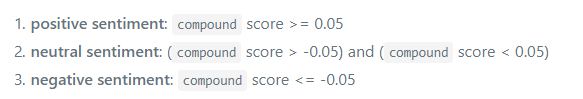

In [17]:
sentence = "I feel better todays. The sunny day  makes me happy."
score = analyser.polarity_scores(sentence)
print(score['compound'])

0.8555


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/cmourlas/DataAnalysisPython/master/week7/samplenews.csv', nrows=500) #epilegoume posa rows theloume na fortwsoume

In [32]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,date,year,month,day,author,title,article,url,section,publication,fb_shares,loveCount,wowCount,sadCount,angryCount,thankfulCount,likeCount,hahaCount,commentCount,fb_type,fb_image,upvotes,reddit_comments
0,0,0,0,0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,NaN,Vox,113.0,4.0,12.0,45.0,29.0,0.0,575.0,5.0,121.0,photo,https://external.xx.fbcdn.net/safe_image.php?d...,NaN,NaN


In [0]:
df = df[['date','year','month','day','author','title','article']]

In [40]:
df.head()

,date,year,month,day,author,title,article
0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent..."
1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...
2,2018-01-26 00:00:00,2018,1.0,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ..."
3,2019-06-27 00:00:00,2019,6.0,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...
4,2016-01-27 00:00:00,2016,1.0,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...


In [0]:
df['sentTitle'] = df['title'].apply(lambda x : analyser.polarity_scores(x)['compound'])

In [44]:
df.head(5)

,date,year,month,day,author,title,article,sentTitle
0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",-0.1779
1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,-0.3612
2,2018-01-26 00:00:00,2018,1.0,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",-0.7506
3,2019-06-27 00:00:00,2019,6.0,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,-0.1779
4,2016-01-27 00:00:00,2016,1.0,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,-0.3612


In [0]:
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')

In [46]:
df.head(5)

,date,year,month,day,author,title,article,sentTitle
0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",-0.1779
1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,-0.3612
2,2018-01-26 00:00:00,2018,1.0,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",-0.7506
3,2019-06-27 00:00:00,2019,6.0,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,-0.1779
4,2016-01-27 00:00:00,2016,1.0,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,-0.3612


In [47]:
df.dtypes

date         datetime64[ns]
year                  int64
month               float64
day                   int64
author               object
title                object
article              object
sentTitle           float64
dtype: object

In [0]:
df.set_index('date' , inplace=True)

In [49]:
df.head()

,year,month,day,author,title,article,sentTitle
date,,,,,,,
2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",-0.1779
2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,-0.3612
2018-01-26 00:00:00,2018,1.0,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",-0.7506
2019-06-27 00:00:00,2019,6.0,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,-0.1779
2016-01-27 00:00:00,2016,1.0,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,-0.3612


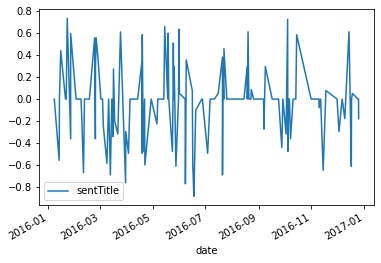

In [56]:
df['2016':'2016'].plot(y='sentTitle')

Ομαδοποίηση με το resample και όχι με το groupby
Για να ομοαδοποιήσουμε με βάση τον χρόνο θέλουμε ένα συγκεκριμένες παραμέτρους στο resample(). Μία ωραία περιγραφή των παραμέτρων υπάρχει εδω... http://stackoverflow.com/a/17001474 

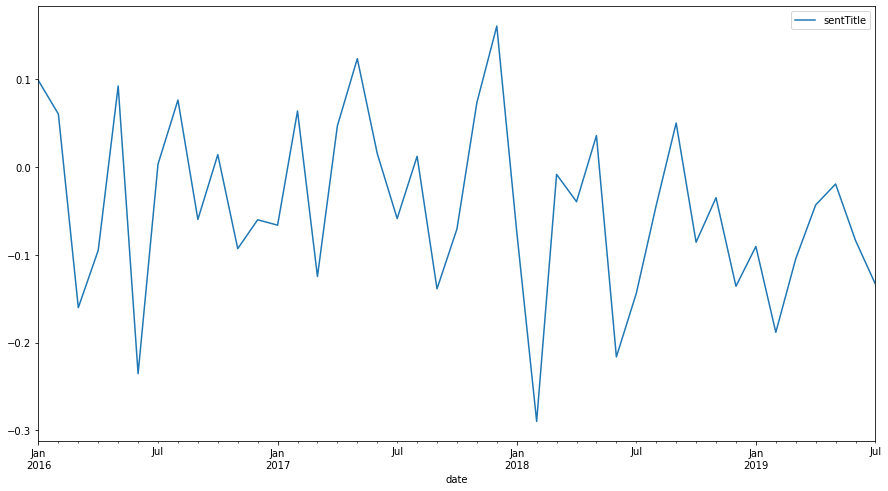

In [60]:
df.resample('M').mean().plot(y='sentTitle', figsize=(15, 8))

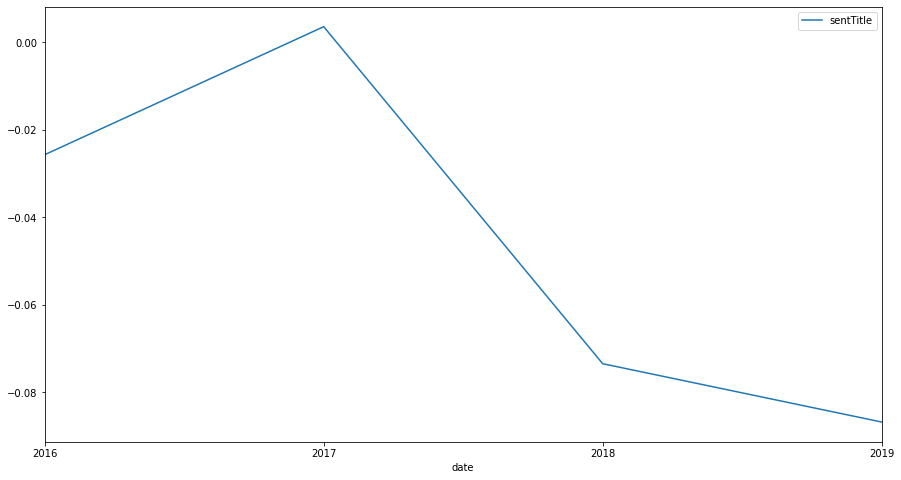

In [61]:
df.resample('A').mean().plot(y='sentTitle', figsize=(15, 8))

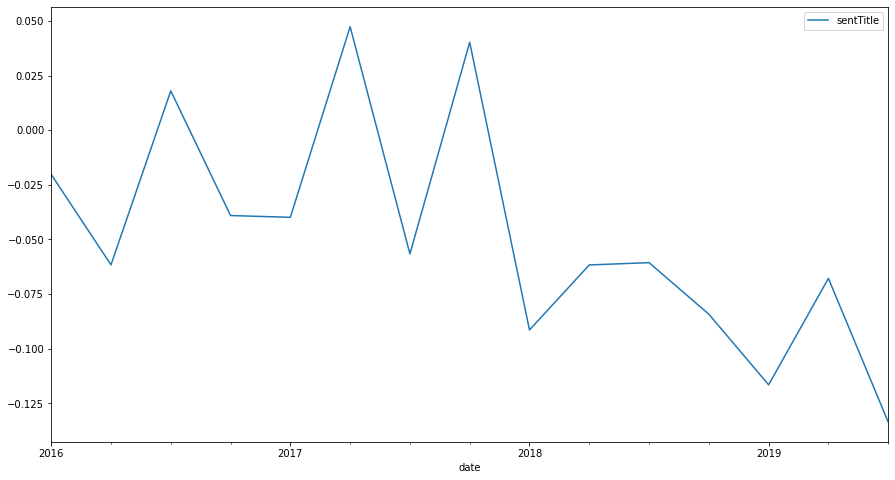

In [62]:
df.resample('Q').mean().plot(y='sentTitle', figsize=(15, 8))

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

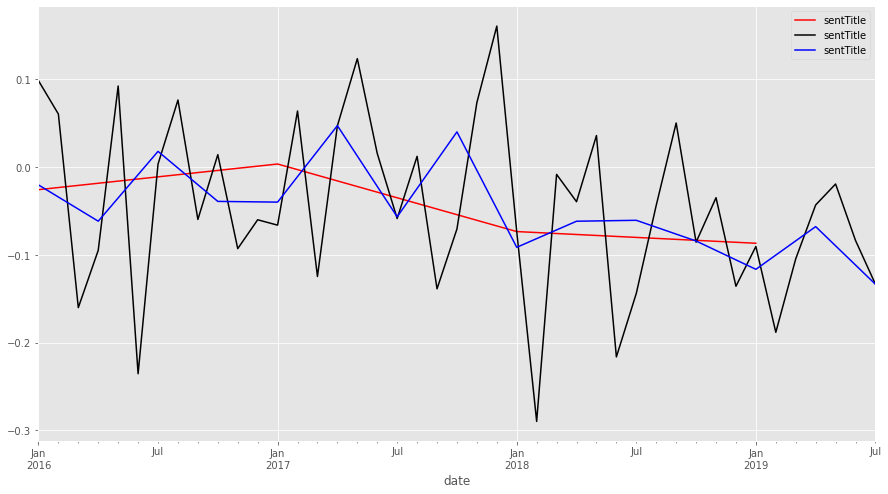

In [71]:
ax = df.resample('A').mean().plot(y='sentTitle', figsize=(15, 8), color='red')
df.resample('M').mean().plot(y='sentTitle', figsize=(15, 8), ax = ax, color ='black')
df.resample('Q').mean().plot(y='sentTitle', figsize=(15, 8),ax = ax, color = 'blue')

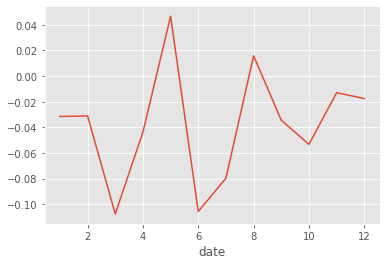

In [74]:
df.groupby(by=df.index.month)['sentTitle'].mean().plot()